In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

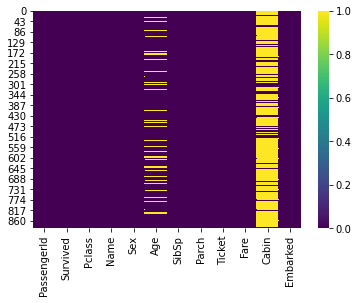

In [8]:
sns.heatmap(df.isnull(),cmap='viridis')

In [9]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

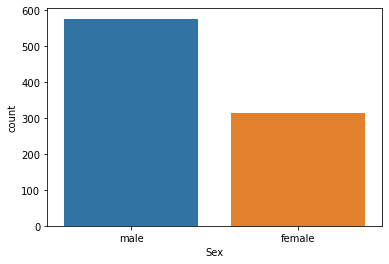

In [10]:
sns.countplot(x='Sex',data=df)

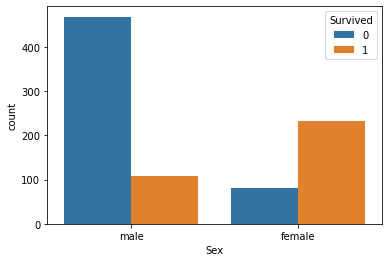

In [11]:
sns.countplot(x='Sex',hue='Survived',data=df)

In [19]:
p=df.groupby('Pclass')['Survived'].sum().reset_index()

In [21]:
p.set_index('Pclass')

,Survived
Pclass,
1,136
2,87
3,119


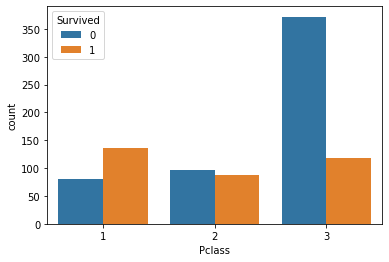

In [22]:
sns.countplot(x='Pclass',hue='Survived',data=df)

In [23]:
df.drop(['Cabin'],axis=1,inplace=True)

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [25]:
df['Age'].isnull().sum()

177

In [30]:
x=df['Age'].mean()
x

29.69911764705882

In [31]:
df['Age'].fillna(x)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [32]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [54]:
def age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38.23
        elif Pclass==2:
            return 29.87
        else:
            return 25.14
    else:
        return Age

In [55]:
df['Age']=df[['Age','Pclass']].apply(age,axis=1)

In [56]:
df['Age']

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
886    27.00
887    19.00
888    25.14
889    26.00
890    32.00
Name: Age, Length: 891, dtype: float64

In [57]:
df.groupby('Pclass')['Fare'].sum()

Pclass
1    18177.4125
2     3801.8417
3     6714.6951
Name: Fare, dtype: float64

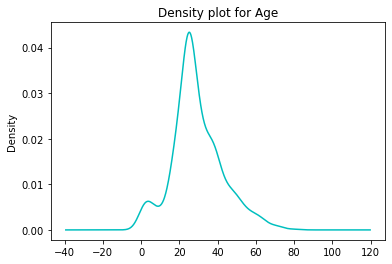

In [58]:
df.Age.plot(kind='kde',title='Density plot for Age',color='c')

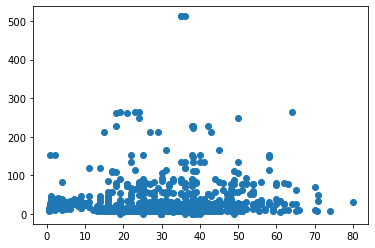

In [59]:
plt.scatter(df.Age,df.Fare)

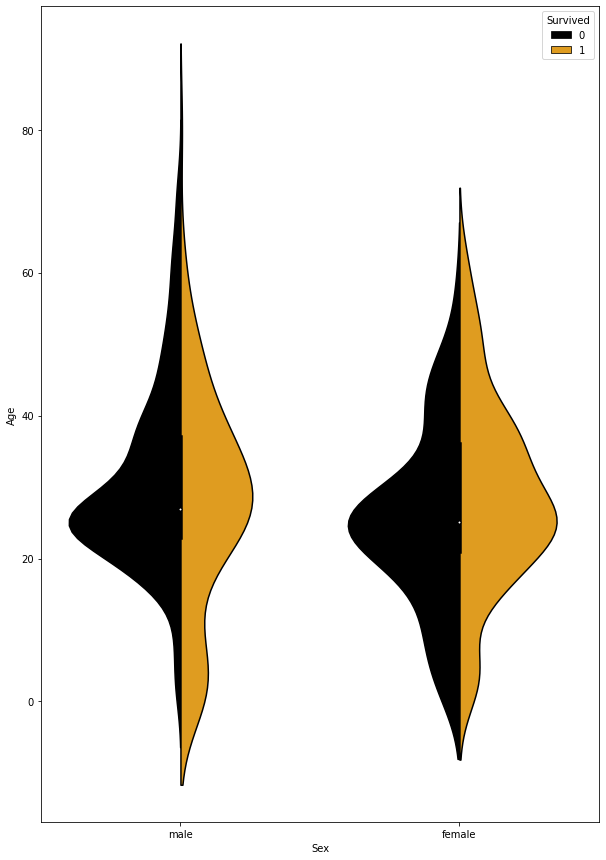

In [60]:
fig=plt.figure(figsize=(10,15))
sns.violinplot(x='Sex',y='Age',hue='Survived',data=df,split=True,palette={0:'black',1:'orange'})

In [61]:
df['Embarked'].isnull().sum()

2

In [62]:
df['Embarked'].fillna('S',inplace=True)

In [63]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [64]:
#select appropriate features for selection
df.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [65]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [66]:
##3 types we can change the categorical values into numerical values
1.Dummy values
2.Replace
3.Labelencoder(one hot encoding)

SyntaxError: invalid syntax (<ipython-input-66-e74ca3ffb3a3>, line 2)

In [67]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [68]:
df['Sex']=label_encoder.fit_transform(df['Sex'])

In [69]:
df['Embarked']=label_encoder.fit_transform(df['Embarked'])

In [70]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.00,1,0,7.2500,2
1,1,1,0,38.00,1,0,71.2833,0
2,1,3,0,26.00,0,0,7.9250,2
3,1,1,0,35.00,1,0,53.1000,2
4,0,3,1,35.00,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.00,0,0,13.0000,2
887,1,1,0,19.00,0,0,30.0000,2
888,0,3,0,25.14,1,2,23.4500,2
889,1,1,1,26.00,0,0,30.0000,0


In [71]:
#z=df['Embarked'].replace(to_replace=['S', 'C', 'Q'], value=[1, 2, 3])

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [73]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [74]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [75]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [77]:
x_train.shape

(712, 7)

In [78]:
x_test.shape

(179, 7)

In [79]:
y_test.shape

(179,)

In [80]:
y_train.shape

(712,)

In [82]:
model=LogisticRegression()

In [83]:
model.fit(x_train,y_train)

C:\Users\srika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
y_pred=model.predict(x_test)

In [85]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [86]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
accuracy_score(y_test,y_pred)*100

77.6536312849162

In [87]:
print(model.score(x_test,y_test))

0.776536312849162


In [88]:
print('f1 score:',f1_score(y_test,y_pred))

f1 score: 0.7014925373134329


In [89]:
print(recall_score(y_test,y_pred))

0.7230769230769231


In [90]:
print(precision_score(y_test,y_pred))

0.6811594202898551


In [101]:
y_pred = model.predict_proba(x_test)[:, 1] > 0.75

In [102]:
y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True, False,  True, False,  True,  True, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False,

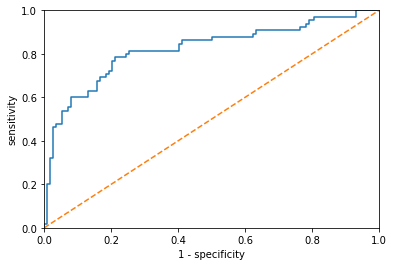

In [98]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

In [112]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)
y_pred_proba1 = model1.predict_proba(x_test)
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba1[:, 1]))



model 1 AUC score: 0.8214574898785425


C:\Users\srika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [117]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.8214574898785425

In [118]:
model2 = LogisticRegression()
model2.fit(x_train[:, 0:2], y_train)
y_pred_proba2 = model2.predict_proba(x_test[:, 0:2])
print("model 2 AUC score:", roc_auc_score(y_test, y_pred_proba2[:, 1]))

TypeError: '(slice(None, None, None), slice(0, 2, None))' is an invalid key